In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#1. Using Fisher's Iris data (Table 11.5), answer the following questions. Note the class membership is already known.
#   However, you may pretend the membership is unknown for the purpose of cluster analysis. (Use Python package for this question.)
iris = pd.read_fwf('iris.dat', header=None, delim_whitespace = True, names=['Sepal length(x1)','Sepal width(x2)','Petal length(x3)','Petal width(x4)','Species'])
iris

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [3]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
iris2 = iris.copy()
iris2.iloc[:,:4] = scaler.fit_transform(iris2.iloc[:,:4])
iris2

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),Species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,3
146,0.555556,0.208333,0.677966,0.750000,3
147,0.611111,0.416667,0.711864,0.791667,3
148,0.527778,0.583333,0.745763,0.916667,3


In [4]:
#(a) Perform hierarchical cluster analysis using centroid method. How many clusters do you find?
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
x = iris2.drop('Species', axis=1)
y = iris2['Species']
y=y-1 #change labeling for consistency
x

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


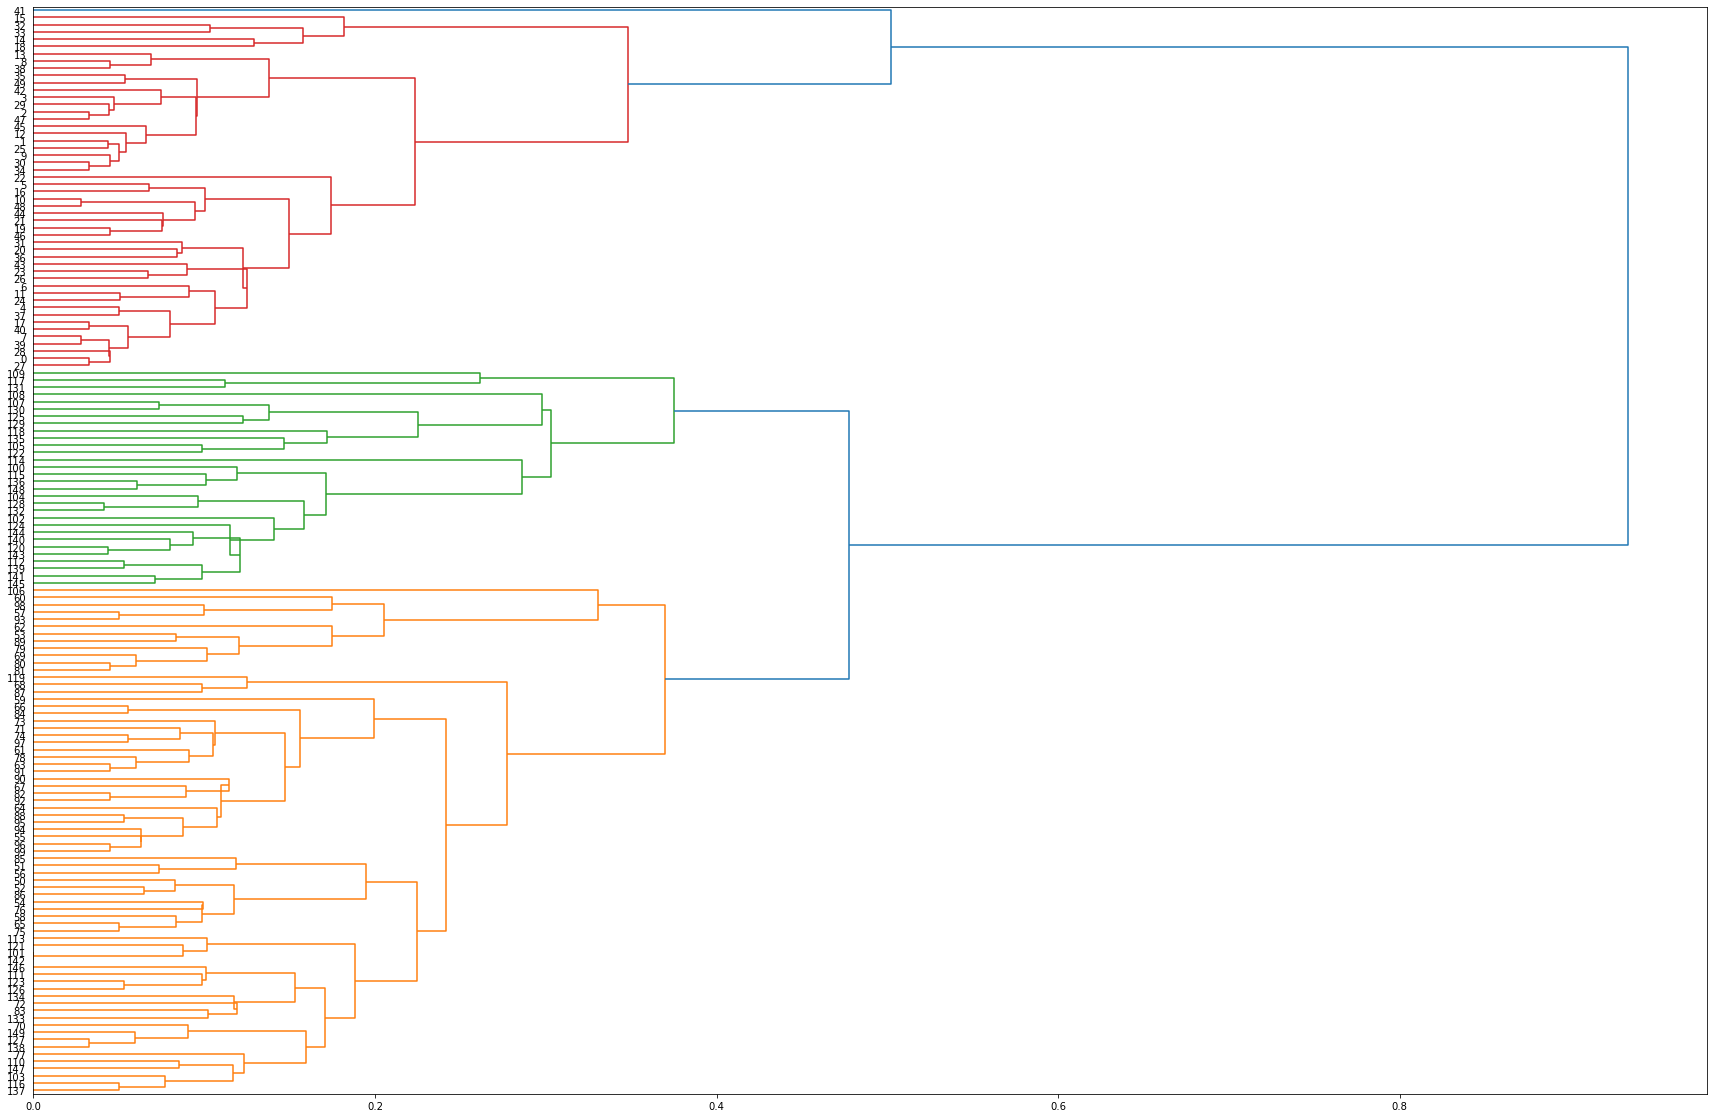

In [6]:
linked = linkage(x, method = 'centroid')
labelList = list(range(150))
plt.figure(figsize = (30, 20))
dendrogram(linked, 
           orientation = 'right',
           count_sort = 'descending',
           distance_sort = 'descending',
           labels = labelList,
           leaf_font_size = 10,
          get_leaves = True,
          color_threshold = 0.4)
plt.show()

[137,
 116,
 103,
 147,
 110,
 77,
 138,
 127,
 149,
 70,
 133,
 83,
 72,
 134,
 126,
 123,
 111,
 146,
 142,
 101,
 121,
 113,
 75,
 65,
 58,
 76,
 54,
 86,
 52,
 50,
 56,
 51,
 85,
 99,
 96,
 55,
 94,
 95,
 88,
 64,
 92,
 82,
 67,
 90,
 91,
 63,
 78,
 61,
 97,
 74,
 71,
 73,
 84,
 66,
 59,
 87,
 68,
 119,
 81,
 80,
 69,
 79,
 89,
 53,
 62,
 93,
 57,
 98,
 60,
 106,
 145,
 141,
 139,
 112,
 143,
 120,
 140,
 144,
 124,
 102,
 132,
 128,
 104,
 148,
 136,
 115,
 100,
 114,
 122,
 105,
 135,
 118,
 129,
 125,
 130,
 107,
 108,
 131,
 117,
 109,
 27,
 0,
 28,
 39,
 7,
 40,
 17,
 37,
 4,
 24,
 11,
 6,
 26,
 23,
 43,
 36,
 20,
 31,
 46,
 19,
 21,
 44,
 48,
 10,
 16,
 5,
 22,
 34,
 30,
 9,
 25,
 1,
 12,
 45,
 47,
 2,
 29,
 3,
 42,
 49,
 35,
 38,
 8,
 13,
 18,
 14,
 33,
 32,
 15,
 41]

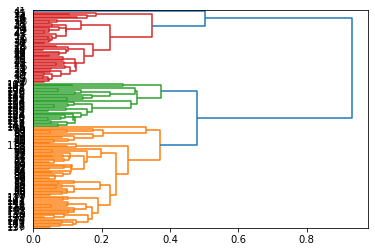

In [7]:
#Get leaves
leaves = dendrogram(linked, 
           orientation = 'right',
           count_sort = 'descending',
           distance_sort = 'descending',
           labels = labelList,
           leaf_font_size = 10,
           get_leaves = True,
           color_threshold = 0.4)['leaves']
leaves

In [8]:
#(b) Plot the first two principal component scores with the cluster label.
#Cluster 1 (red)
hier_clust1 = leaves[100:]
hier_clust1

[27,
 0,
 28,
 39,
 7,
 40,
 17,
 37,
 4,
 24,
 11,
 6,
 26,
 23,
 43,
 36,
 20,
 31,
 46,
 19,
 21,
 44,
 48,
 10,
 16,
 5,
 22,
 34,
 30,
 9,
 25,
 1,
 12,
 45,
 47,
 2,
 29,
 3,
 42,
 49,
 35,
 38,
 8,
 13,
 18,
 14,
 33,
 32,
 15,
 41]

In [9]:
#Cluster 2 (orange)
hier_clust2 = leaves[:70]
hier_clust2

[137,
 116,
 103,
 147,
 110,
 77,
 138,
 127,
 149,
 70,
 133,
 83,
 72,
 134,
 126,
 123,
 111,
 146,
 142,
 101,
 121,
 113,
 75,
 65,
 58,
 76,
 54,
 86,
 52,
 50,
 56,
 51,
 85,
 99,
 96,
 55,
 94,
 95,
 88,
 64,
 92,
 82,
 67,
 90,
 91,
 63,
 78,
 61,
 97,
 74,
 71,
 73,
 84,
 66,
 59,
 87,
 68,
 119,
 81,
 80,
 69,
 79,
 89,
 53,
 62,
 93,
 57,
 98,
 60,
 106]

In [10]:
#Cluster 3 (green)
hier_clust3 = leaves[70:100]
hier_clust3

[145,
 141,
 139,
 112,
 143,
 120,
 140,
 144,
 124,
 102,
 132,
 128,
 104,
 148,
 136,
 115,
 100,
 114,
 122,
 105,
 135,
 118,
 129,
 125,
 130,
 107,
 108,
 131,
 117,
 109]

In [11]:
#Label clusters
hier_clusters = pd.Series(range(150))
hier_clusters = hier_clusters.replace(to_replace = hier_clust1, value = 0)
hier_clusters = hier_clusters.replace(to_replace = hier_clust2, value = 1)
hier_clusters = hier_clusters.replace(to_replace = hier_clust3, value = 2)
hier_clusters

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    1
148    2
149    1
Length: 150, dtype: int64

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(x)

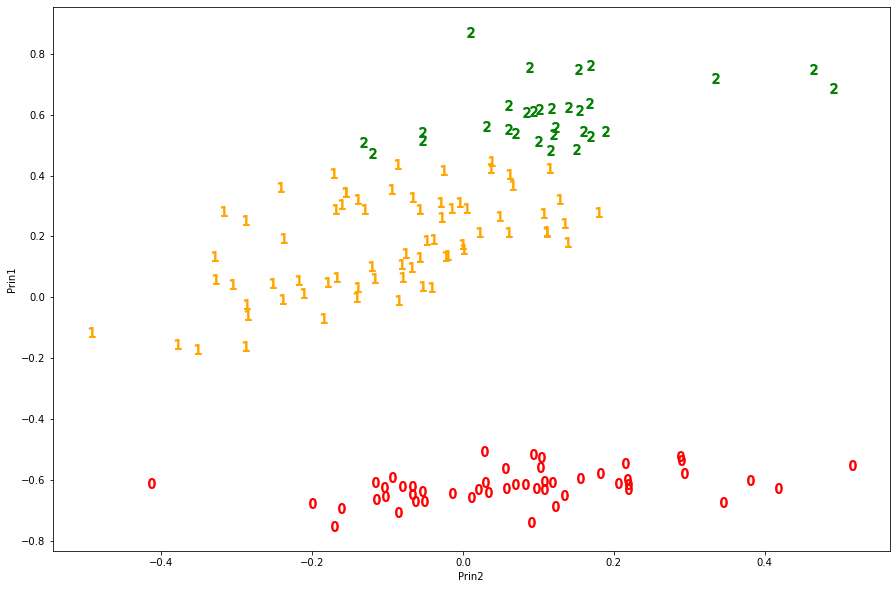

In [13]:
plt.figure(figsize = (15,10))
plt.xlabel('Prin2') ; plt.ylabel('Prin1')
color = {0:'red', 1:'orange', 2:'green'}
for i in range(len(x)):
    plt.scatter(pc[i,1], pc[i,0], 
                marker = "$ {} $".format(hier_clusters[i]), 
                s = 100, 
                c = color[hier_clusters[i]])

In [14]:
#(c) Compare the clusters with the actual class using confusion matrix.
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_hier = hier_clusters

C1 = pd.DataFrame(confusion_matrix(y_hier, y),
                  index = np.sort(y_hier.unique()), 
                  columns = np.sort(y.unique()))
C1['Total'] = C1.sum(axis = 1) #row sum
C1.loc['Total',:] = C1.sum(axis = 0) # column sum
C1.index.names = ['From class'] ; C1.columns.names = ['Classified class']
C1.astype(int)

Classified class,0,1,2,Total
From class,,,,
0,50,0,0,50
1,0,50,20,70
2,0,0,30,30
Total,50,50,50,150


In [15]:
#(d) Perform the K-means cluster analysis with the number of clusters you acquired in (a).
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(x)
group = pd.DataFrame(kmeans.labels_, columns=['cluster'])
Xkmean = x.join(group)
Xkmean

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4),cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [16]:
# Cluster Frequency
Xkmean.groupby('cluster').count()

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4)
cluster,,,,
0,50,50,50,50
1,61,61,61,61
2,39,39,39,39


In [17]:
# Cluster Means
Xkmean.groupby('cluster').mean()

,Sepal length(x1),Sepal width(x2),Petal length(x3),Petal width(x4)
cluster,,,,
0,0.196111,0.595000,0.078305,0.060833
1,0.441257,0.307377,0.575715,0.549180
2,0.707265,0.450855,0.797045,0.824786


In [18]:
#(e) Plot the first two principal components with the cluster label.
pca2 = PCA(n_components = 2)
pc2 = pca2.fit_transform(x)

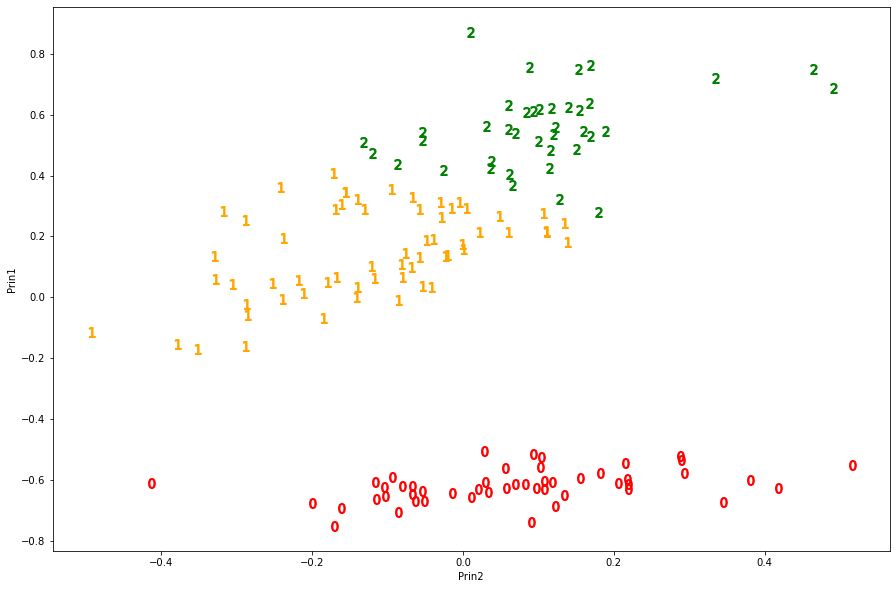

In [19]:
plt.figure(figsize = (15,10))
plt.xlabel('Prin2') ; plt.ylabel('Prin1')
color = {0:'red', 1:'orange', 2:'green'}
for i in range(len(x)):
    plt.scatter(pc2[i,1], pc2[i,0], 
                marker = "$ {} $".format(Xkmean['cluster'][i]), 
                s = 100, 
                c = color[Xkmean['cluster'][i]])

In [20]:
#(f) Compare the results of the two cluser analyses using confusion matrix. Do they produce similar clusters?
# Confusion Matrix
y_hier = hier_clusters
y_kmean = Xkmean['cluster']

C2 = pd.DataFrame(confusion_matrix(y_hier, y_kmean),
                  index = np.sort(y_hier.unique()), 
                  columns = np.sort(y_kmean.unique()))
C2['Total'] = C2.sum(axis = 1) #row sum
C2.loc['Total',:] = C2.sum(axis = 0) # column sum
C2.index.names = ['Hierarchical'] ; C2.columns.names = ['K-means']
C2.astype(int)

K-means,0,1,2,Total
Hierarchical,,,,
0,50,0,0,50
1,0,61,9,70
2,0,0,30,30
Total,50,61,39,150
